In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Introduction

In this mini project, We are going to develop a few tools for basic image manipulation.

A digital image is a two-dimensional array or matrix of _pixels_. Each **pixel** has a _color_ and represents a tiny, monochromatic, square patch of the full image. A common way to encode **colors** is to specify them as a mixture of the basic colors _red_ (R), _green_ (G), and _blue_ (B). These are also known as the **channels** and we will work with an image format where each channel for each pixel takes a float value between 0 and 1, known as the **brightness** of the channel. Here 0 means that the corresponding basic color is completely dark, whereas 1 means that it is maximally bright.
The following table lists a few examples of common standard colors (in the PDF version, the text color of the bullet points in the "Color" column may not reflect the correct color):

| R | G | B | Color |
|---|---|---|---|
| 0 | 0 | 0 | <span style='color:#000000;'>&#9679;</span> black |
| 1 | 0 | 0 | <span style='color:#FF0000;'>&#9679;</span> red |
| 0 | 1 | 0 | <span style='color:#00FF00;'>&#9679;</span> green |
| 0 | 0 | 1 | <span style='color:#0000FF;'>&#9679;</span> blue |
| 1 | 1 | 0 | <span style='color:#FFFF00;'>&#9679;</span> yellow |
| 0.5 | 0 | 0.5 | <span style='color:#800080;'>&#9679;</span> purple |
| 0.5 | 0.5 | 0.5 | <span style='color:#808080;'>&#9679;</span> gray |
| 1 | 1 | 1 | <span style='color:#FFFFFF;'>&#9679;</span> white |

## 1: Loading and saving images

You will know that there are numerous existing formats for storing images in files, such as JPG, PNG, GIF, BMP, ... These formats are all binary and some of them use special compression algorithms to store the image information more efficiently than just providing the RGB values of all pixels. For this exercise, however, we will use our own, very simple, text-based format which does precisely this, it is just a text file with the red, green, and blue values of each pixel.

### (a) Channel-wise import

In [2]:
# first, read in file to get the numbers of rows and columns
image_R = np.loadtxt("queens_building.R.txt")
image_G = np.loadtxt("queens_building.G.txt")
image_B = np.loadtxt("queens_building.B.txt")

# after testing, r,g,b data are all np.array with shape.250x386
# we can now create a 3D array according to the above shape, then it'll be 250x386x3
try:
    if image_R.shape == image_G.shape == image_B.shape:
        image = np.zeros((image_R.shape[0], image_R.shape[1], 3))
    else:
        raise ValueError("The shapes of R, G, B channels are not the same.")
except Exception as error:
    print(error)

# use loop to do a grid fill for all RGB values from image_R, image_G, image_B into variable image
for i in range(image_R.shape[0]):
    for j in range(image_R.shape[1]):
        image[i][j][0] = image_R[i][j]  # index 0 for R channel
        image[i][j][1] = image_G[i][j]  # index 1 for G channel
        image[i][j][2] = image_B[i][j]  # index 2 for B channel

# test shape
# print(image.shape)
# print(len(image))

### (b) Displaying images 

Display the imported image using the `matplotlib.pyplot.imshow` function.

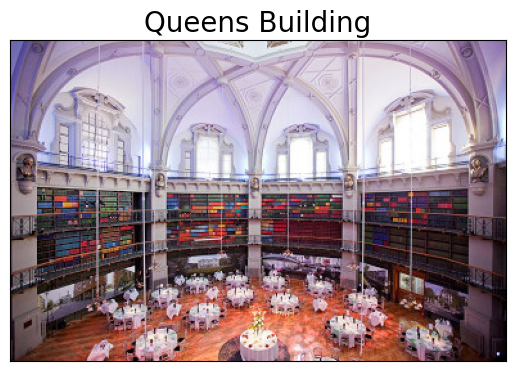

In [3]:
# simply use imshow to show the image
plt.imshow(image)

# hide axis ticks
plt.yticks([])
plt.xticks([])
plt.title("Queens Building", fontsize=20)
plt.show()

### (c) Custom-format export

Having separate files for the R, G, and B channels is a bit inconvenient. Instead, we would like to store our images in a custom text-based format as follows:
- individual lines correspond to the _rows_ of the image;
- _columns_ are separated by commas;
- the numerical values of the three channels for each pixel are separated by spaces.

For example, a 3x4 image with red pixels in the first row, (medium) gray pixels in the second row, and purple pixels in the third row will be stored like this:

    1.0 0.0 0.0,1.0 0.0 0.0,1.0 0.0 0.0,1.0 0.0 0.0
    0.5 0.5 0.5,0.5 0.5 0.5,0.5 0.5 0.5,0.5 0.5 0.5
    0.5 0.0 0.5,0.5 0.0 0.5,0.5 0.0 0.5,0.5 0.0 0.5

Below We will write a function `save_image` that takes a file name and an image and stores the image in the format as defined above.
The function will return `True` if the file was written successfully or `False` if an error occurred.

In [4]:
def save_image(filename, image):
    """
    Saves RGB information from an image array into a txt file
    with assinged file name.

    Parameters:
        filename(str): Name of the file, should end in txt.
        image(numpy.ndarray): Image with shape: i x j x 3 (ith row, jth column, 3 color)

    Returns:
        bool: True if txt file is written successfully, False otherwise
    """
    # should try if the input image is acutal an numpy array with i x j x 3 dimensions
    try:
        # check for input type
        if not isinstance(image, np.ndarray):
            raise TypeError("Image should be a numpy array")
        # check for 3 dimensions with 3 colors
        elif not image.ndim == 3 or not image.shape[2] == 3:
            raise ValueError("Image should be a numpy array with shape i x j x 3")

        # if above test pass, then start writing file.
        # setup row index to write in requested form
        row_index = 0
        with open(filename, "w") as file:
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    if i == row_index:
                        file.write(
                            f"{image[i][j][0]} {image[i][j][1]} {image[i][j][2]}"
                        )
                        # use comma after each pixel except the last one in the row
                        if j != len(image[i]) - 1:
                            file.write(",")
                    else:
                        file.write(
                            f"\n{image[i][j][0]} {image[i][j][1]} {image[i][j][2]}"
                        )
                        if j != len(image[i]) - 1:
                            file.write(",")

                        row_index += 1
        print(f"{filename} written successfully")
        return True

    except Exception as error:
        print(error)
        return False


# test with our image
save_image("queens_building.txt", image)
# test with other files
image_wrong_dimension1 = np.array([[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12]])
image_wrong_dimension2 = np.array([[[1, 2], [4, 5]], [[7, 8], [10, 11]]])
correct_small_image = np.array([[[1.0, 0.5, 0], [0, 0.3, 0.4]], [[1, 0, 1], [0, 0, 1]]])
save_image("test1.txt", image_wrong_dimension1)  # should be False and print error
save_image("test2.txt", image_wrong_dimension2)  # should be False and print error
save_image("test3.txt", correct_small_image)  # should be true

queens_building.txt written successfully
Image should be a numpy array with shape i x j x 3
Image should be a numpy array with shape i x j x 3
test3.txt written successfully


True

### (d) Custom-format import

Next, we will Write the corresponding import function `load_image` that takes the name of a file in our custom image format and returns the numpy image array or `None` if an error occurs.
Then we will use the function to re-import the image from `queens_building.txt` and assign it to a variable `image2`.
Verify that the original `image` and the re-imported `image2` contain the same data by checking that the brightness values of all pixels and channels agree.

In [5]:
# in the txt file, the row data is in sring file with comma, space and \n
# first we define a fucnction to clean the row up, return a list of float numbers
def clean_string(string_input):
    """
    Take a string, remove \n space and return a list of float numbers only

    Parmeter:
        string_input(str): string to be cleaned

    Returns:
        list: list of numbers
    """
    # remove \n at the bottom
    string = string_input.strip()
    # replace comma with space
    string = string.replace(",", " ")
    # split the number by spaces
    string = string.split(" ")
    # change strings into float
    list_of_numbers = [float(numbers) for numbers in string]
    return list_of_numbers


def load_image(file_name):
    """
    Take the name fomr custom image format created by function 'save_image'
    and return a standard numpy image array.

    Parameters:
        filename(str): Name of the file, the file should be in custom-format
        which is created by function save_image.

    Returns:
        Standard numpy image array with shape i x j x 3
        (ith row, jth column, 3 = R,G,B color respectively)
    """
    try:
        # try using the cleans tring function to clean my daya
        all_data_rows = []
        with open("queens_building.txt", "r") as file:
            # initialize first row
            nextline = file.readline()
            while len(nextline) != 0:
                # append sublist
                all_data_rows.append(clean_string(nextline))
                # look for next line
                nextline = file.readline()

        # after getting clean data, it's time to get the shape of the image
        # we assume pixels in image is distributed in a rectangular shape
        data_matrix = np.zeros((len(all_data_rows), len(all_data_rows[0]), 3))
        # time to fill the np.array with our data saved in list
        for i in range(len(all_data_rows)):
            for j in range(len(all_data_rows[i])):
                # we use divmod to get index number of column
                # quotient = real col index
                # remainder = 0 => R, 1 => G, 2 = >B respectively
                real_col, rgb_index = divmod(j, 3)
                if rgb_index == 0:
                    data_matrix[i][real_col][0] = all_data_rows[i][j]
                elif rgb_index == 1:
                    data_matrix[i][real_col][1] = all_data_rows[i][j]
                elif rgb_index == 2:
                    data_matrix[i][real_col][2] = all_data_rows[i][j]
        return data_matrix

    except Exception as error:
        print(error)
        return None


# use my function to convert txt into np image array
image2 = load_image("queens_building.txt")

# lets do a full grid comparison
test_check = True
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            if image[i][j][k] != image2[i][j][k]:
                test_check = False
print(test_check)  # if all grid comparison passed it should remain True

True


## Image transformations

Next, we will explore a few ways to transform images.

### (a) Grayscale

Now, we will Write a function `grayscale` that takes an image (as a numpy array as before) and converts it to a _grayscale image_. A grayscale image is an array of shape `(height, width)` whose values encode the _average brightness_ of the pixels on a scale from 0 to 1, i.e., the average over the three color channels.
For example, assume that the color image has values
```python
image[3, 9, 0] = 0.25
image[3, 9, 1] = 0.7
image[3, 9, 2] = 1.0
```
corresponding to the brightnesses of the red, green, and blue channels of the pixel at $(3, 9)$.
Then the corresponding array `image_gray` representing the grayscale value should have an entry
`image_gray[3, 9] = 0.65`
because $\frac{1}{3} (0.25 + 0.7 + 1.0) = 0.65$. 

We then use the function to obtain a grayscale version of the Queens' Building `image`, assign it to a variable `image_gray`, and display it.

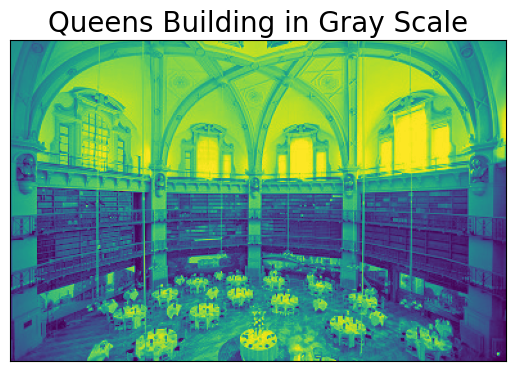

In [6]:
def grayscale(input_img):
    """
    Take an input_img array and convert it into grayscale.

    Parameters:
        input_img(numpy.ndarray): Image with shape: i x j x 3 (ith row, jth column, 3 color)

    Returns:
        numpy.ndarray: A grayscale img array with shape: i x j
        output_img_array[i][j] = np.mean(input_img[i][j][0]~[i][j][2])
    """
    # check for input type
    if not isinstance(input_img, np.ndarray):
        raise TypeError("Image should be a numpy array")
    # check for 3 dimensions with 3 colors
    elif not input_img.ndim == 3 or not input_img.shape[2] == 3:
        raise ValueError("Image should be a numpy array with shape i x j x 3")
    # if above test pass, then start transforming our input_img
    # start with checking our shape of output
    grayscale_nparray = np.zeros((len(input_img), len(input_img[0])))
    # use the formula above to convert RGB to grayscale
    # and fill into the nparray
    for i in range(input_img.shape[0]):
        for j in range(input_img.shape[1]):
            grayscale_nparray[i][j] = (
                input_img[i][j][0] + input_img[i][j][1] + input_img[i][j][2]
            ) / 3.0

    return grayscale_nparray


# change input_img to gray scalue and show it
image_gray = grayscale(image)
# not sure why plt.imshow() shows the image in a weird way
# the image_gray np array should be correct, by definition.
plt.imshow(image_gray)
plt.yticks([])
plt.xticks([])
plt.title("Queens Building in Gray Scale", fontsize=20)
plt.show()

### (b) Color rescaling

We can apply functions $f : [0, 1] \to [0, 1]$ to all channels of all pixels to adjust the colors of our image.
Consider the mapping
\begin{equation}
    f(x) = (1 - \alpha) (1 - x)^\gamma + \alpha x^\gamma
\end{equation}
for arbitrary $\alpha \in [0, 1]$ and $\gamma > 0$.

We can choose some meaningful combinations of $\alpha$ and $\gamma$ values and verify by means of a suitable plot that this function $f(x)$ indeed maps the interval $[0, 1]$ onto itself. Add axes labels and a legend to your plot.

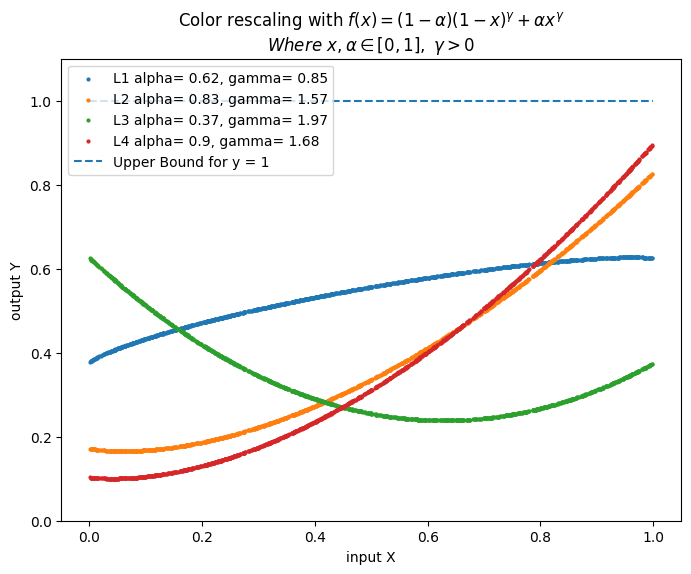

In [7]:
# define a function to convert [0, 1] → [0, 1] with f(x) = (1-alpha)(1-x)^gamma + alpha*x^gamma
def f(x, alpha=0.5, gamma=1):
    """
    Take a number and return a number with f(x) = (1-alpha)(1-x)^gamma + alpha*x^gamma

    Parameters:
        x(float): a number between [0, 1]

        alpha(float): a number between [0, 1], default = 0.5
        gamma(float): a number > 0, defualt = 1

    Returns:
        float: a number between [0, 1]
    """
    return (1 - alpha) * (1 - x) ** gamma + alpha * x**gamma


# setup x in between [0, 1] and we'll verify if our function
# can correctly project x to y where y is in [0, 1] as well
# randomly choose 4 alpha, gamma
alpha1, alpha2, alpha3, alpha4 = np.random.random(4)
# make sure gamma >0, so make the lowerbound a little bit higher
gamma1, gamma2, gamma3, gamma4 = np.random.uniform(0.000000000001, 2, 4)
# get a bunch of x for function projection
x = np.random.uniform(0, 1, 1000)
y1 = f(x, alpha=alpha1, gamma=gamma1)
y2 = f(x, alpha=alpha2, gamma=gamma2)
y3 = f(x, alpha=alpha3, gamma=gamma3)
y4 = f(x, alpha=alpha4, gamma=gamma4)

# start plotting with above parameter
plt.figure(figsize=(8, 6))
plt.scatter(x, y1, s=4, label=f"L1 alpha= {round(alpha1,2)}, gamma= {round(gamma1,2)}")
plt.scatter(x, y2, s=4, label=f"L2 alpha= {round(alpha2,2)}, gamma= {round(gamma2,2)}")
plt.scatter(x, y3, s=4, label=f"L3 alpha= {round(alpha3,2)}, gamma= {round(gamma3,2)}")
plt.scatter(x, y4, s=4, label=f"L4 alpha= {round(alpha4,2)}, gamma= {round(gamma4,2)}")
plt.hlines(1, 0, 1, label=f"Upper Bound for y = 1", linestyles="--")
plt.ylim(0, 1.1)
plt.xlabel("input X")
plt.ylabel("output Y")
plt.title(
    r"Color rescaling with $f(x)=(1-\alpha)(1-x)^\gamma+\alpha x^\gamma$" + "\n"
    r"$Where \ x, \alpha \in [0,1], \ \gamma > 0$"
)
plt.legend()
plt.show()

# We can clearly see that for valid alpha and beta, the function will map in range [0, 1]

### (c) Color rescaling (2)

We will write a Python function `rescale_colors` that applies the above rescaling transformation for given $\alpha$ and $\gamma$ to an image (in the form of a 3D numpy array as in Exercise 1) and returns the transformed image. Display transformed images of the Queens' Building `image` for the choices $\alpha = 0$, $\gamma = 1$ and $\alpha = 1$, $\gamma = 2$.

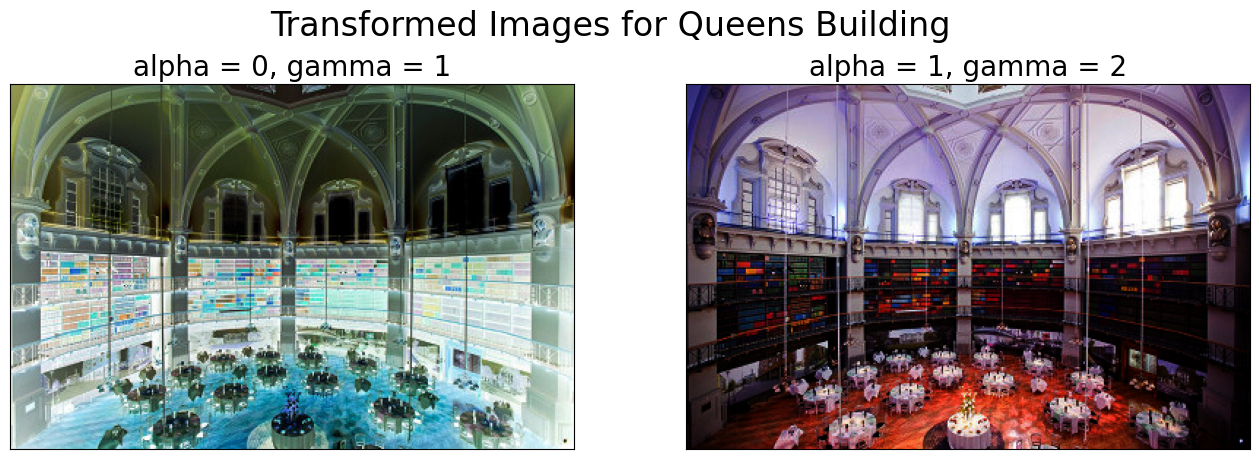

In [8]:
# i've aleady created function above, so i'll just copy and change the name of it.
def rescale_colors(x, alpha, gamma):
    """
    Take a number and return a number with f(x) = (1-alpha)(1-x)^gamma + alpha*x^gamma

    Parameters:
        x(float): a number between [0, 1]

        alpha(float): a number between [0, 1], default = 0.5
        gamma(float): a number > 0, defualt = 1

    Returns:
        float: a number between [0, 1]
    """
    return (1 - alpha) * (1 - x) ** gamma + alpha * x**gamma


# simply apply the function in each data point in the array to get the rescaled data
# define two empty array that has same size as our initial image
transformed_image1 = np.zeros(image.shape)
transformed_image2 = np.zeros(image.shape)
# you loops for to put each pixel in the image into our rescale_color function
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            transformed_image1[i][j][k] = rescale_colors(
                image[i][j][k], alpha=0, gamma=1
            )
            transformed_image2[i][j][k] = rescale_colors(
                image[i][j][k], alpha=1, gamma=2
            )

# display transformed image, with sub plots
fig, axis = plt.subplots(1, 2, figsize=(16, 9))
# first plot
axis[0].set_xticks([])
axis[0].set_yticks([])
axis[0].set_title("alpha = 0, gamma = 1", size=20)
axis[0].imshow(transformed_image1)
# second plot
axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].set_title("alpha = 1, gamma = 2", size=20)
axis[1].imshow(transformed_image2)
fig.suptitle("Transformed Images for Queens Building", fontsize=24, y=0.78)
plt.show()

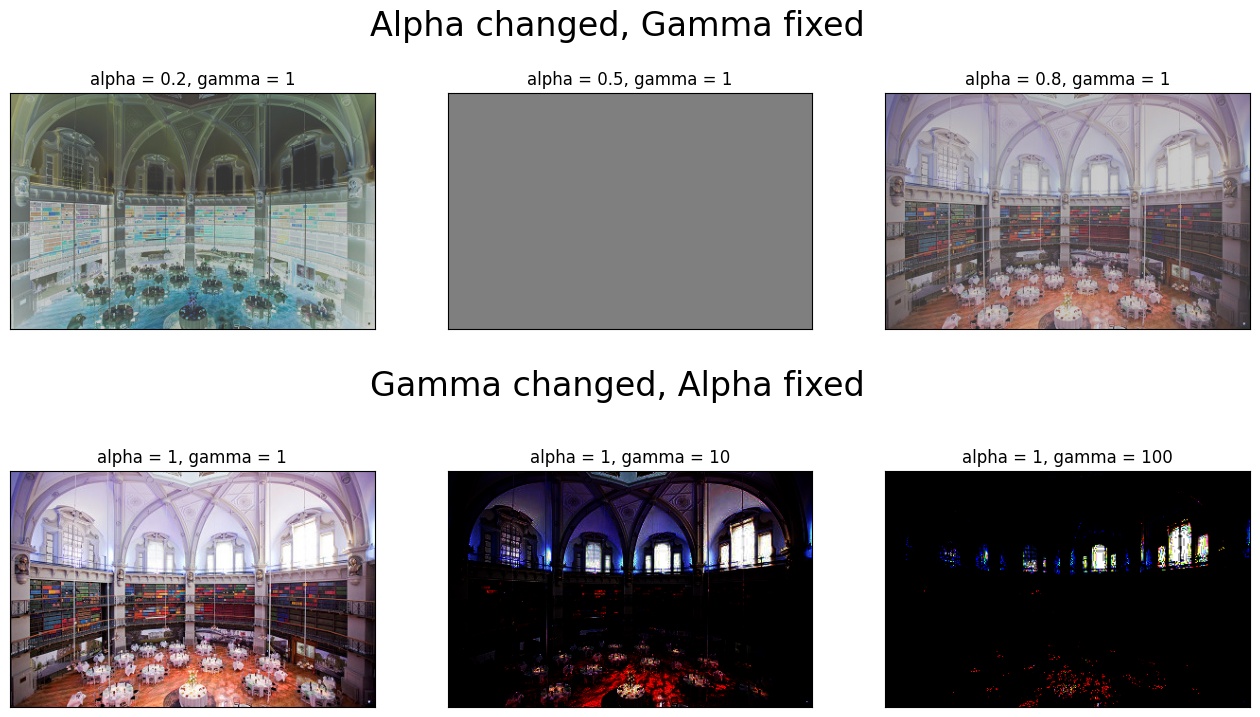

In [9]:
# before  answering queestion, should make a subplot to compare the difference.

test1 = np.zeros(image.shape)
test2 = np.zeros(image.shape)
test3 = np.zeros(image.shape)
test4 = np.zeros(image.shape)
test5 = np.zeros(image.shape)
test6 = np.zeros(image.shape)

# you loops for to put each pixel in the image into our rescale_color function
for i in range(len(image)):
    for j in range(len(image[i])):
        for k in range(len(image[i][j])):
            test1[i][j][k] = rescale_colors(image[i][j][k], alpha=0.2, gamma=1)
            test2[i][j][k] = rescale_colors(image[i][j][k], alpha=0.5, gamma=1)
            test3[i][j][k] = rescale_colors(image[i][j][k], alpha=0.8, gamma=1)
            test4[i][j][k] = rescale_colors(image[i][j][k], alpha=1, gamma=1)
            test5[i][j][k] = rescale_colors(image[i][j][k], alpha=1, gamma=10)
            test6[i][j][k] = rescale_colors(image[i][j][k], alpha=1, gamma=100)

# display transformed image, with sub plots
fig, axis = plt.subplots(2, 3, figsize=(16, 9))
# first row compare the change of alpha, fix gamma
axis[0, 0].set_xticks([])
axis[0, 0].set_yticks([])
axis[0, 0].set_title("alpha = 0.2, gamma = 1")
axis[0, 0].imshow(test1)

axis[0, 1].set_xticks([])
axis[0, 1].set_yticks([])
axis[0, 1].set_title("alpha = 0.5, gamma = 1")
axis[0, 1].imshow(test2)

axis[0, 2].set_xticks([])
axis[0, 2].set_yticks([])
axis[0, 2].set_title("alpha = 0.8, gamma = 1")
axis[0, 2].imshow(test3)
# second row compare the change of alpha, fix gamma
axis[1, 0].set_xticks([])
axis[1, 0].set_yticks([])
axis[1, 0].set_title("alpha = 1, gamma = 1")
axis[1, 0].imshow(test4)

axis[1, 1].set_xticks([])
axis[1, 1].set_yticks([])
axis[1, 1].set_title("alpha = 1, gamma = 10")
axis[1, 1].imshow(test5)

axis[1, 2].set_xticks([])
axis[1, 2].set_yticks([])
axis[1, 2].set_title("alpha = 1, gamma = 100")
axis[1, 2].imshow(test6)

fig.text(x=0.35, y=0.9, s="Alpha changed, Gamma fixed", fontsize=24)
fig.text(x=0.35, y=0.5, s="Gamma changed, Alpha fixed", fontsize=24)
plt.show()

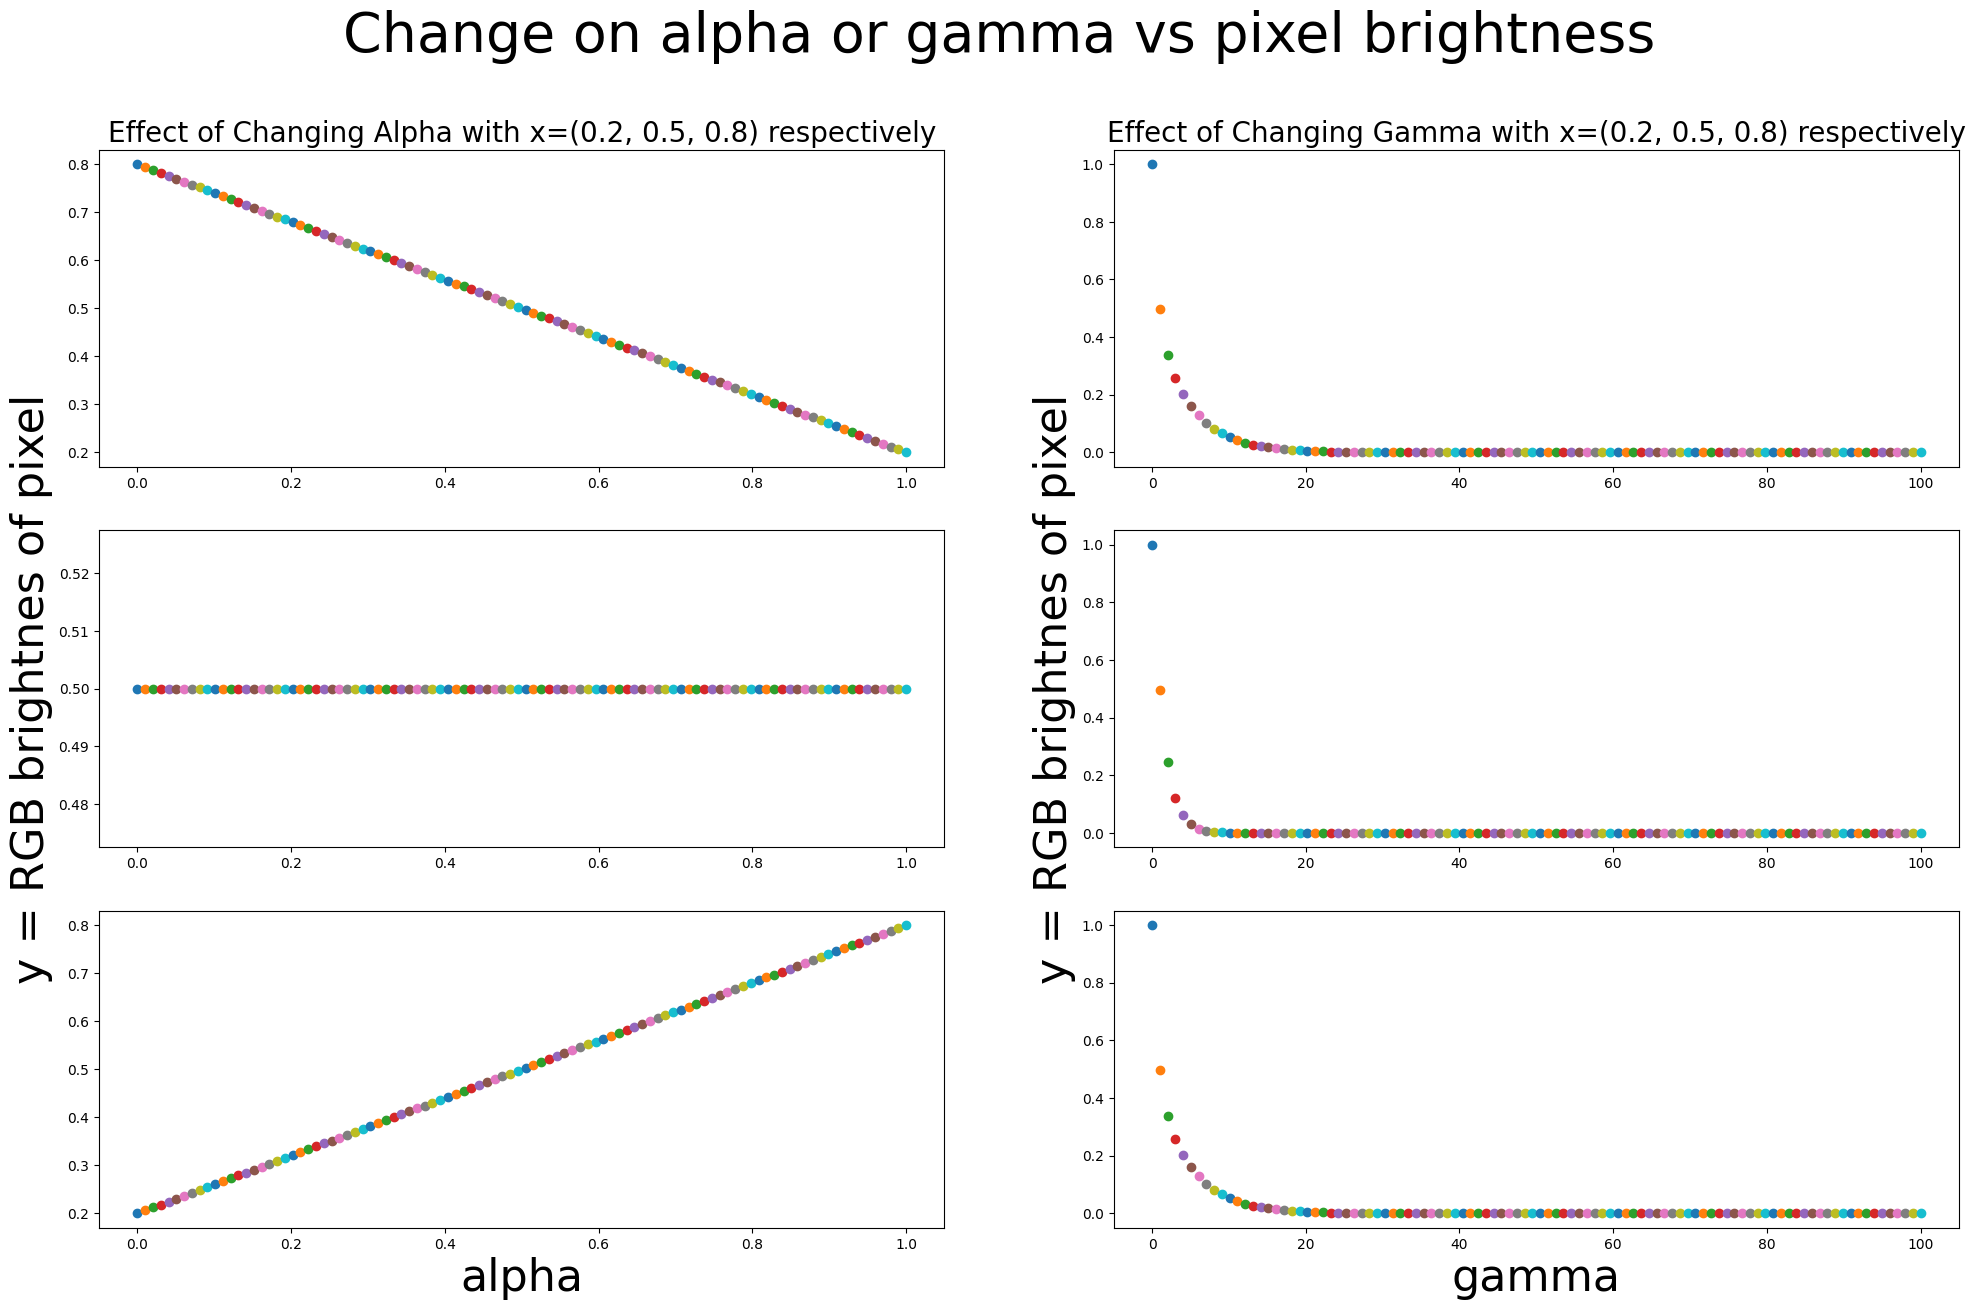

In [10]:
# let'see how it works in euqation given.
fig, axis = plt.subplots(3, 2, figsize=(24, 14))
point_number = 100
# set up 3 input x values shown in row1, row2, row 3
x1 = 0.2
x2 = 0.5
x3 = 0.8
# fixed gamma, change alpha
alpha_change = np.linspace(0, 1, point_number)
for i in range(point_number):
    y1 = rescale_colors(x1, alpha_change[i], gamma=1)
    y2 = rescale_colors(x2, alpha_change[i], gamma=1)
    y3 = rescale_colors(x3, alpha_change[i], gamma=1)
    axis[0, 0].scatter(alpha_change[i], y1)
    axis[1, 0].scatter(alpha_change[i], y2)
    axis[2, 0].scatter(alpha_change[i], y3)

axis[0, 0].set_title(
    f"Effect of Changing Alpha with x={x1, x2, x3} respectively", size=20
)

axis[2, 0].set_xlabel("alpha", size=32)
axis[1, 0].set_ylabel("y = RGB brightnes of pixel", size=32)

# fixed alpha, change gamma
gamma_change = np.linspace(0.0000001, 100, point_number)
for j in range(point_number):
    y1 = rescale_colors(x1, alpha=0.5, gamma=gamma_change[j])
    y2 = rescale_colors(x2, alpha=0.5, gamma=gamma_change[j])
    y3 = rescale_colors(x3, alpha=0.5, gamma=gamma_change[j])
    axis[0, 1].scatter(gamma_change[j], y1)
    axis[1, 1].scatter(gamma_change[j], y2)
    axis[2, 1].scatter(gamma_change[j], y3)

axis[0, 1].set_title(
    f"Effect of Changing Gamma with x={x1, x2, x3} respectively", size=20
)
axis[2, 1].set_xlabel("gamma", size=32)
axis[1, 1].set_ylabel("y = RGB brightnes of pixel", size=32)

fig.suptitle("Change on alpha or gamma vs pixel brightness", fontsize=40)
plt.show()

### (e) Blur filter

In this section, we will write a function `blur` that takes an image and returns a blurred version of it. The blur filter should work as follows: The color of each pixel is replaced by a _weighted average_ over the colors of the pixel itself and neighboring pixels within a specified _radius_ $r$. Use the Euclidean distance to determine which neighboring pixels should be included.
The _relative weight_ of a pixel at a distance $d$ from the current pixel should be $\frac{r - d}{r}$. The absolute weight of a pixel is its relative weight divided by the sum of the relative weights of all contributing pixels, i.e., all pixels within the radius $r$.

For example, if the central pixel is at position $C = (3, 7)$,
then the distance to a second pixel at position $B = (1, 4)$ is
\begin{equation}
    d(B, C) = \sqrt{ (B_1 - C_1)^2 + (B_2 - C_2)^2 } = \sqrt{ (1 - 3)^2 + (4 - 7)^2 } = \sqrt{13} \approx 3.6 \,.
\end{equation}
Hence the pixel at $B$ is within a radius of $r = 4$ from $C$, but outside a radius of $r = 3$.
If the radius is $r = 4$, for example, then the relative weight of the pixel at $B$ in the average to determine the value at position $C$ should be
\begin{equation}
    \frac{r-d}{r} = \frac{4 - \sqrt{13}}{4} \approx 0.0986 \,.
\end{equation}

Generate blurred versions of the Queens' Building `image` with radii $r = 2$ and $r = 4$ and display them along with the original image in a suitable plot.


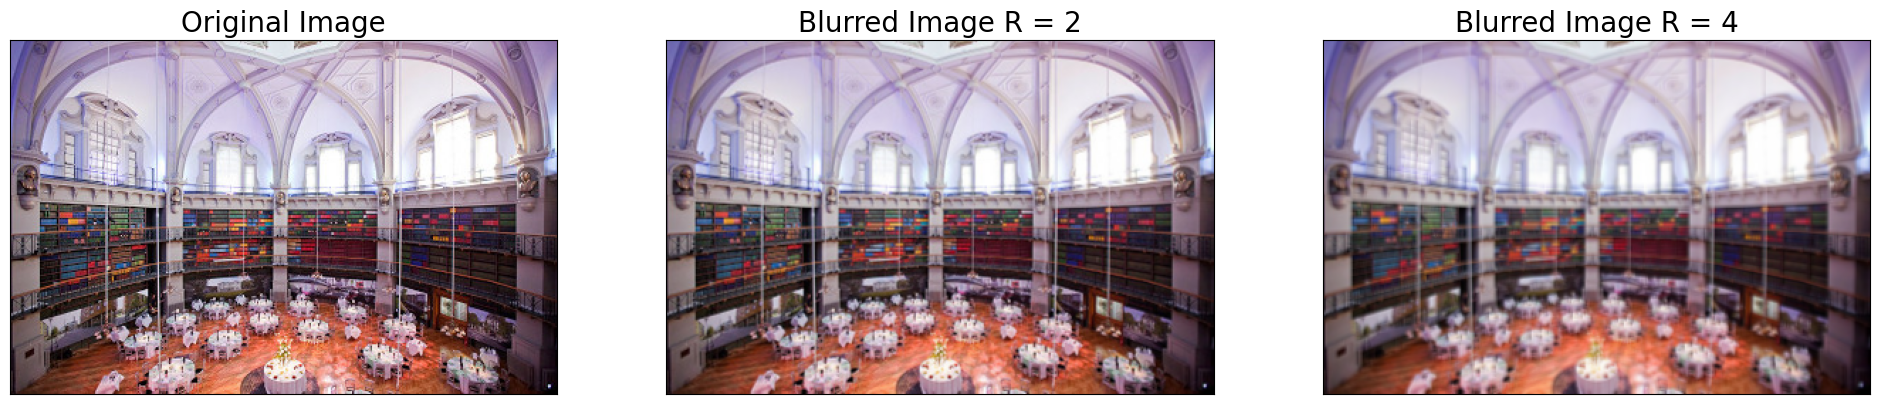

In [11]:
# define all function needed. 1. distance, 2. relative weight. 3. blur
# blur function:
# 1. choose a image, choose a r
# 2. for each pixel, we replace the value with the weighted average
# with weight = (r-d)/r, where d is the distance between the neighbor pixel
# in radius and the pixel itself
def distance(point1, point2):
    """
    Takes two points and return the distance between them.

    Parameter:
        point1(tuple): a tuple with two float of x, y value
        point2(tuple): a tuple with two float of x, y value

    Return:
        dist(float): distance between two points
    """
    return ((point2[1] - point1[1]) ** 2 + (point2[0] - point1[0]) ** 2) ** 0.5


# The plan to do this code is basicaly search the area with range x+-r, y+-r
# We know that the area of square with side length r will be bigger
# than the circle area of diameter r
# so by searching all points in square with length r should be enough.
def blur(image_array, r):
    """
    Takes an image array and return a blurred version of it.
    Actual step:
        1. choose a image, and a radius r
        2. for each pixel, we replace the value with the weighted average
           with weight = (r-d)/r, where d is the distance between the neighbor pixel
           in radius and the pixel itself

        Parameter:
            image_array(np.array): an image array
            r(int): radius of the blur filter

        Return:
            a blurred image array
    """
    # first, we create a new blurred image with same shape as input imgae.
    blurred_image = np.zeros(image_array.shape)
    # setup the varialbe needed
    weight = []
    correspond_value_R = []
    correspond_value_G = []
    correspond_value_B = []
    for i in range(blurred_image.shape[0]):
        for j in range(blurred_image.shape[1]):
            # start to look through all points in x+-r, y+-r
            for k in range(r):
                for l in range(r):
                    # let pixel ij as the center, and look for all points in the square
                    # because we know 0 < i < len(image_array.shape[0])
                    # and 0 < j < len(image_array.shape[1])
                    if (
                        i - k < 0
                        or i + k > image_array.shape[0] - 1
                        or j - l < 0
                        or j + l > image_array.shape[1] - 1
                    ):
                        continue
                    else:
                        # record the weight and correspond_value
                        # check distance
                        if distance((i, j), (i + k, j + l)) <= r:
                            # obtain in distance pixel value and relative weight
                            weight.append((r - distance((i, j), (i + k, j + l))) / r)
                            correspond_value_R.append(image_array[i + k][j + l][0])
                            correspond_value_G.append(image_array[i + k][j + l][1])
                            correspond_value_B.append(image_array[i + k][j + l][2])

            # calculate the weighted average and fill into ith, jth pixel
            new_val_R = 0
            new_val_G = 0
            new_val_B = 0
            for _ in range(len(weight)):
                new_val_R += weight[_] * correspond_value_R[_]
                new_val_G += weight[_] * correspond_value_G[_]
                new_val_B += weight[_] * correspond_value_B[_]
            blurred_image[i][j][0] = new_val_R / np.sum(weight)
            blurred_image[i][j][1] = new_val_G / np.sum(weight)
            blurred_image[i][j][2] = new_val_B / np.sum(weight)
            # reset weight and correspond_value
            weight = []
            correspond_value_R = []
            correspond_value_G = []
            correspond_value_B = []

    return blurred_image


# start plotting, seems good to compare photos with sub plot
blur_image_r2 = blur(image, 2)
blur_image_r4 = blur(image, 4)

fig, axis = plt.subplots(1, 3, figsize=(24, 8))
axis[0].set_xticks([])
axis[0].set_yticks([])
axis[0].set_title("Original Image", size=20)
axis[0].imshow(image)

axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].set_title("Blurred Image R = 2", size=20)
axis[1].imshow(blur_image_r2)

axis[2].set_xticks([])
axis[2].set_yticks([])
axis[2].set_title("Blurred Image R = 4", size=20)
axis[2].imshow(blur_image_r4)
plt.show()

## 3: Color distributions

In below exercise, we will analyze some statistical properties of images.

### (a) Histograms for individual channels 

Generate and display histograms for the R, G, and B channels over all pixels of the Queens' Building `image`.
Add suitable labels for the x and y axes and a title for each plot.

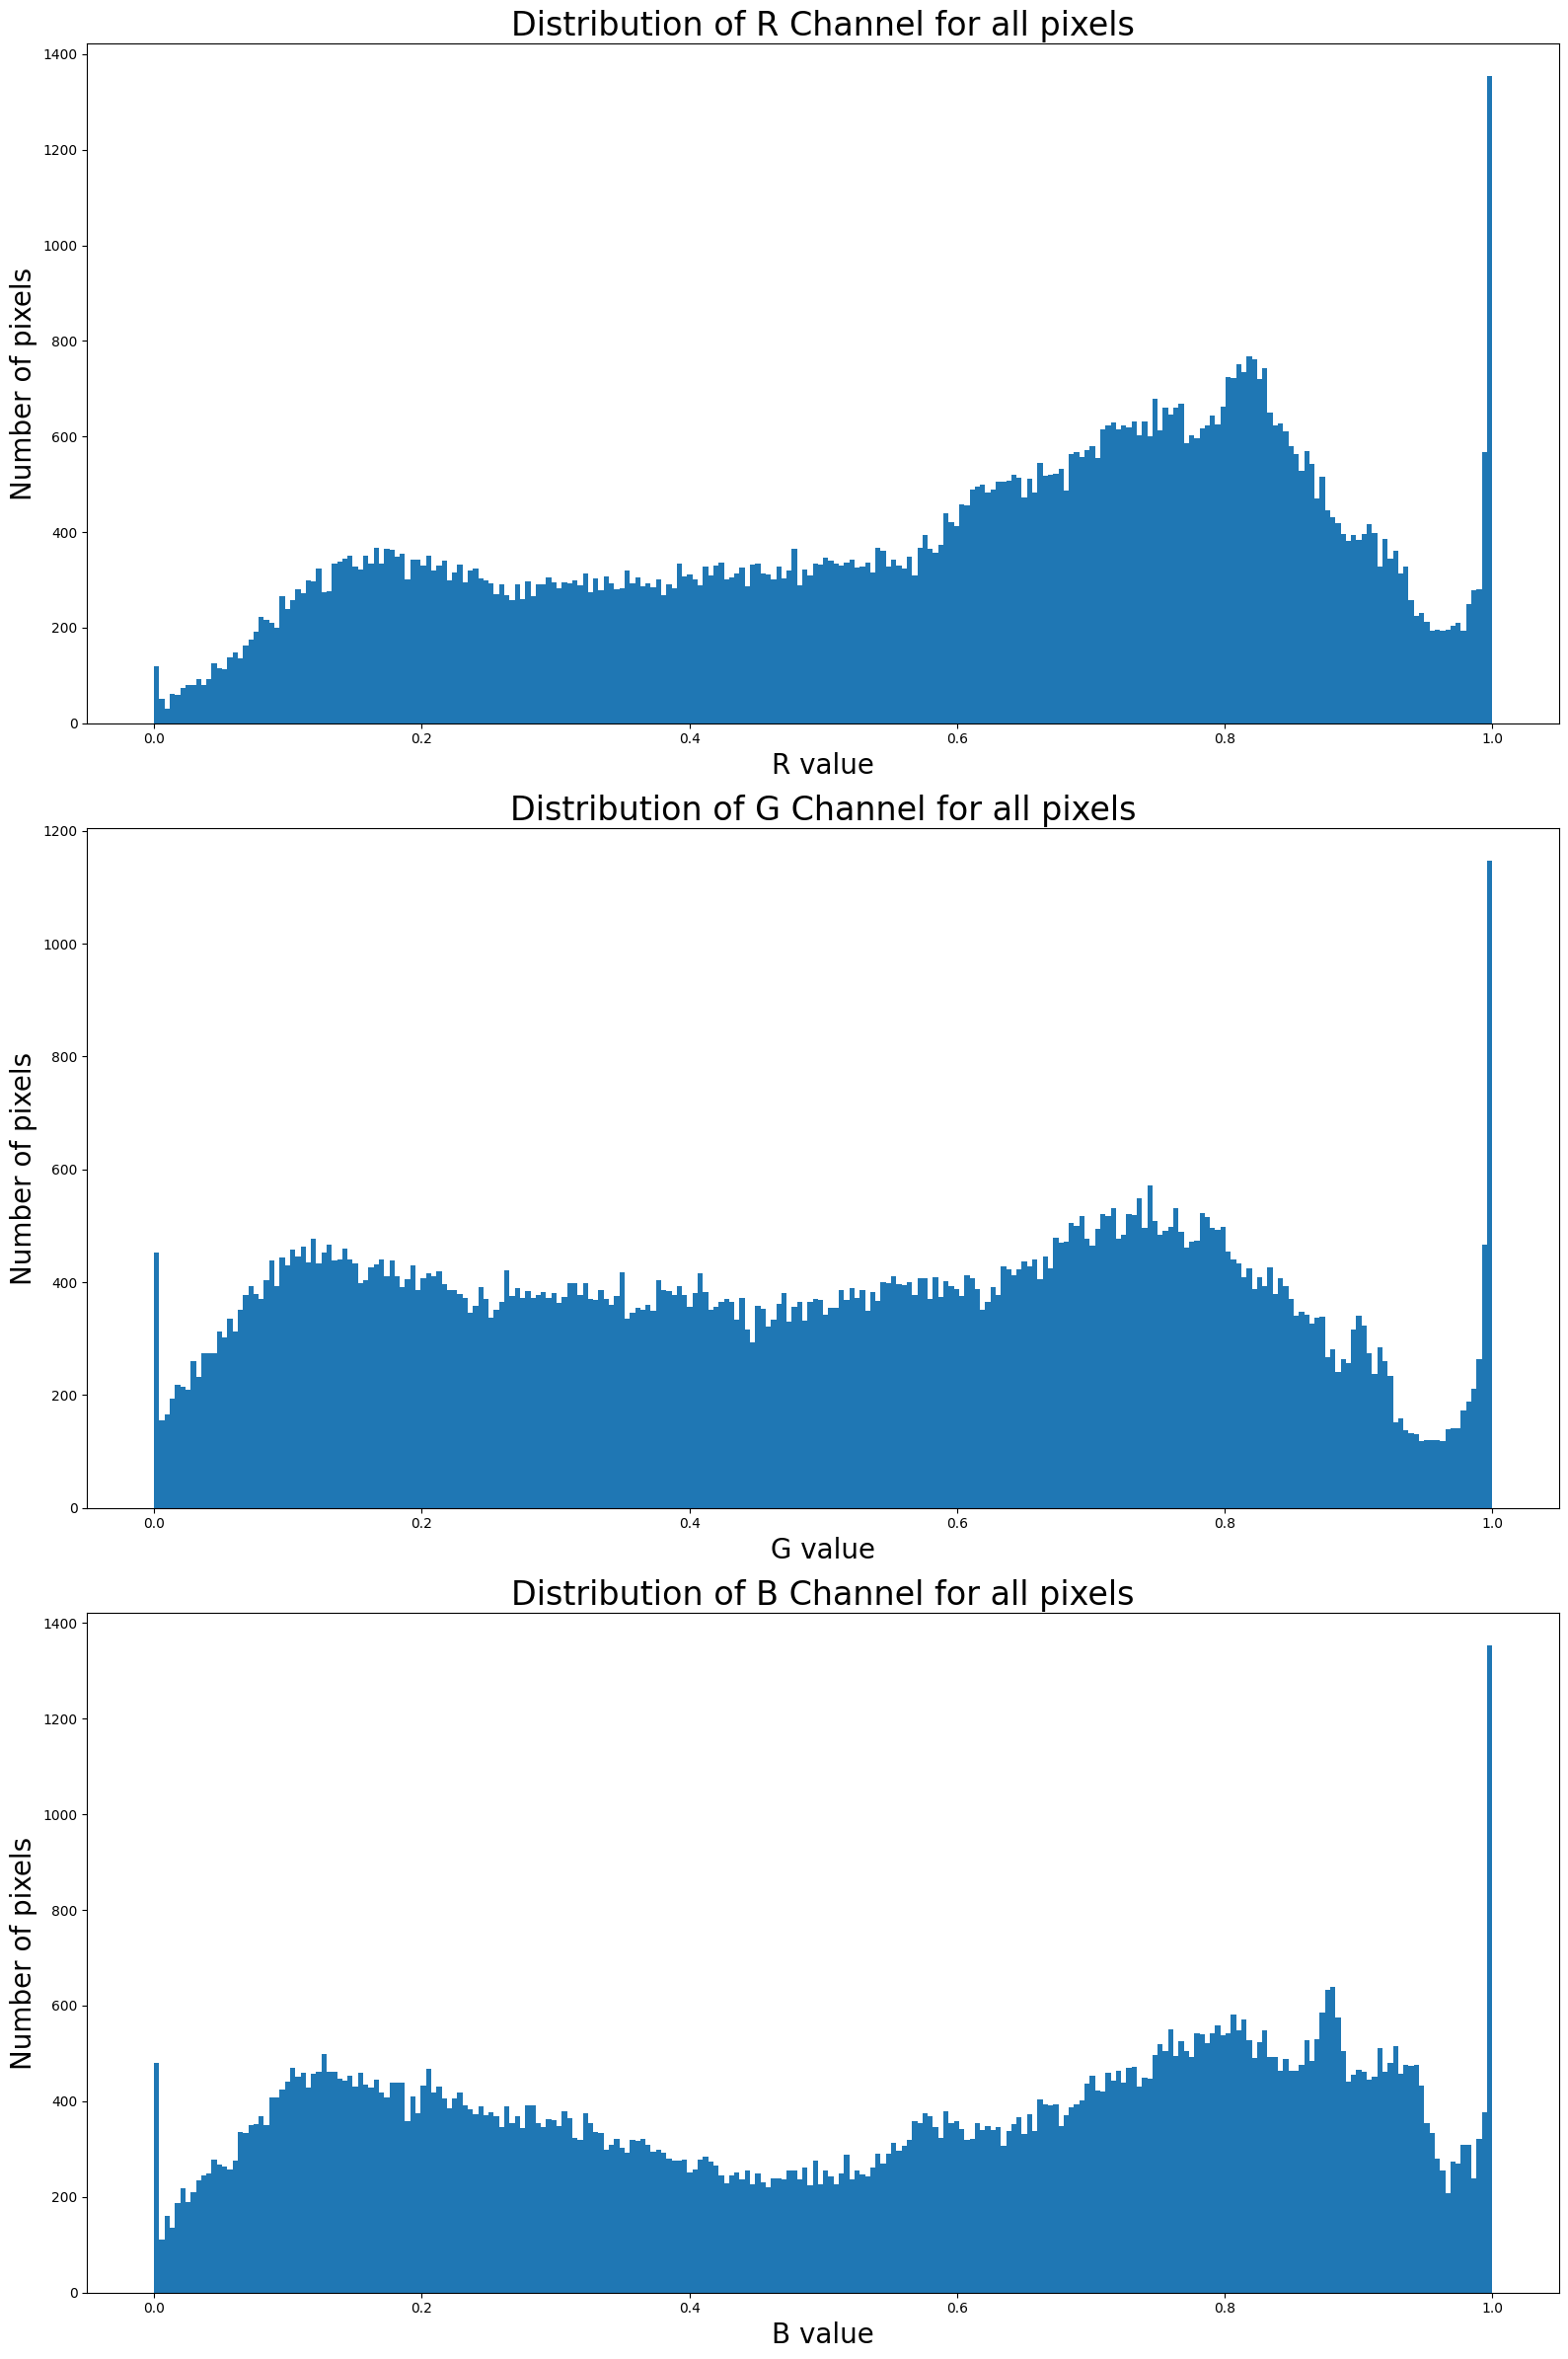

In [12]:
# get three lists that obtain all pixel values of R, G, B repsectively
r_list = []
g_list = []
b_list = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        r_list.append(image[i][j][0])
        g_list.append(image[i][j][1])
        b_list.append(image[i][j][2])

# use subplot to plot 3 channels individually
fig, axis = plt.subplots(3, 1, figsize=(16, 24))
axis[0].set_title("Distribution of R Channel for all pixels", size=24)
axis[0].set_xlabel("R value", size=20)
axis[0].set_ylabel("Number of pixels", size=20)

axis[1].set_title("Distribution of G Channel for all pixels", size=24)
axis[1].set_xlabel("G value", size=20)
axis[1].set_ylabel("Number of pixels", size=20)

axis[2].set_title("Distribution of B Channel for all pixels", size=24)
axis[2].set_xlabel("B value", size=20)
axis[2].set_ylabel("Number of pixels", size=20)

# from question 3_b. full range of RGB is [0, 255]
# hence choose bins = 256 for plotting
axis[0].hist(r_list, bins=256)
axis[1].hist(g_list, bins=256)
axis[2].hist(b_list, bins=256)
plt.tight_layout()
plt.show()

### (b) Dominant colors 

In this section , we will write a function `color_frequencies` that returns the relative frequencies of (classes of) colors in an image.

**Arguments:**
Besides the image (as a 3D numpy array as before), the function `color_frequencies` should take one more argument `num_levels` which determines how many different levels of brightness should be distinguished in every channel. For example, if `num_levels = 4`, then you should have 4 different classes or "bins" per color channel, hence a total of $4^3 = 64$ different "fundamental colors classes" that are distiguished.

To avoid ambiguities, first rescale the brightness values of all pixels and channels by multiplying them by $255$ and rounding them to the nearest integer.
This will result in a numpy array of integer values in the range $0, ..., 255$.
These are the _byte values_ of the channels, and the color class of each pixel should be determined based on these byte values.
This means that, for each channel, the full range of 256 byte values should be subdivided into `num_levels` intervals or "bins" comprising an equal number of byte values (plus/minus 1 given the discrete nature of the byte values).

**Example:**
Assume that we have an image with the following absolute frequencies of colors (after rescaling):

| color (R, G, B) | number of pixels of that color |
|---|---|
| `(  0,   0,   0)` | 10 |
| `( 25,  25,   0)` | 5 |
| `(155, 230, 100)` | 5 |
| `(230, 205,  50)` | 5 |
| `(255,   0, 255)` | 15 |

Using `num_levels = 2`, we only distinguish two brightness levels per channel: "dark" (D) takes all values in $[0, 128)$ and "light" (L) takes all values in $[128, 256)$. Adding a column that indicates the brightness levels for each channel of each color, we can augment the table as follows:

| color (R, G, B) | brightness levels (R, G, B) | number of pixels of that color |
|---|---|---|
| `(  0,   0,   0)` | (D, D, D) | 10 |
| `( 25,  25,   0)` | (D, D, D) | 5 |
| `(155, 230, 100)` | (L, L, D) | 5 |
| `(230, 205,  50)` | (L, L, D) | 5 |
| `(255,   0, 255)` | (L, D, L) | 15 |

This identifies three different color classes in our image:
`(D, D, D)` receives a total of `15` counts from pixels of colors `(0, 0, 0)` and `(25, 25, 0)`;
`(L, L, D)` receives a total of `10` counts from pixels of colors `(155, 230, 100)` and `(230, 205, 50)`;
and `(L, D, L)` receives a total of `15` counts from just the pixels of color `(255, 0, 255)`.

**Return value:**
The function `color_frequencies` should return two lists of equal length:
The first list contains the _mean colors_ of the various classes and the second list contains the corresponding _relative frequencies_ of colors from each class.
Note that the order of the classes does not matter, but the mean colors and frequencies must be in one-to-one correspondence, i.e., the first frequency must correspond to the first mean color, the second frequency to the second mean color, and so on.
The mean color should have brightness values scaled back to $[0, 1]$ and is the average over all colors that would be mapped to the class, not over the colors that can actually be found in the image.

For instance, the mean color of the class `(D, D, D)` in the example from above is `(63.5, 63.5, 63.5)` in the byte scale and thus `(0.25, 0.25, 0.25)` in the float scale (rounded to two decimal places),
the mean color of the `(L, L, D)` class is `(191.5, 191.5, 191.5)` in the byte scale and thus `(0.75, 0.75, 0.25)` in the float scale (rounded to two decimal places),
and the mean color of the `(L, D, L)` class is `(191.5, 63.5, 191.5` in the byte scale and thus `(0.75, 0.25, 0.75)` in the float scale (rounded to two decimal places).
Since the corresponding relative frequencies are $\frac{15}{40} = 0.375$, $\frac{10}{40} = 0.25$, and $\frac{15}{40} = 0.375$ as determined above,
the overall return value of `color_frequencies` in this example should be (mean colors rounded to two decimal places)
```python
[ [0.25, 0.25, 0.25], [0.75, 0.75, 0.25], [0.75, 0.25, 0.75] ], [0.375, 0.25, 0.375]
```

In [13]:
def color_frequencies(image_input, num_levels):
    """
    Function will take an image_input, and use num_levels to divide the color
    into different bins. Then function will return two lists.
    1. One contains the mean color in each bin, and
    2. The other one will return the corresponding frequencies of such color bin.

    Parameter:
        imange_input(numpy.ndarray): image array with shape i x j x 3
        num_levels(int): number of levels to be used to divide bins
    Return:
        mean_colors_list(list): mean colors of the various classes.
        relative_frequencies(list): corrsponding relative frequencies of each color classes.
    """

    # firstly, convert original data into 256 color scale [0~255]
    scaled_image = np.round(image_input * 255, 0)

    # use the num_levels to divide the color into different bins
    quotient, remainder = divmod(256, num_levels)
    group_number = 256 // quotient
    # create a dict for groups as key and lower-bound upper-bound as dictionary
    group_dict = {}
    if remainder == 0:
        for _ in range(group_number):
            group_dict[_] = [quotient * _, quotient * (_ + 1) - 1]
        # considering we could have remainders not yet grouping
    else:
        # set the first group
        group_dict[0] = [0, quotient]
        for _ in range(1, group_number):
            if _ < remainder:
                group_dict[_] = [
                    group_dict[_ - 1][1] + 1,
                    group_dict[_ - 1][1] + quotient + 1,
                ]
            else:
                # no remainders, hence upper_bound - lower_bound = quotient.
                group_dict[_] = [
                    group_dict[_ - 1][1] + 1,
                    group_dict[_ - 1][1] + quotient,
                ]
    # calculate the mean value for each bin, and append into dictionary
    for _ in group_dict:
        mean = np.round(np.mean(group_dict[_]), 0)
        group_dict[_].append(mean)

    # create a color distribuition dictionary to record the groups.
    color_distribuition = {}
    # let's loop through all the pixels
    for i in range(scaled_image.shape[0]):
        for j in range(scaled_image.shape[1]):
            # find the group that the pixel belongs to
            # use 3 loops to find R, G, B group, respectively
            for k in group_dict:
                if (
                    scaled_image[i][j][0] >= group_dict[k][0]
                    and scaled_image[i][j][0] <= group_dict[k][1]
                ):
                    for l in group_dict:
                        if (
                            scaled_image[i][j][1] >= group_dict[l][0]
                            and scaled_image[i][j][1] <= group_dict[l][1]
                        ):
                            for m in group_dict:
                                if (
                                    scaled_image[i][j][2] >= group_dict[m][0]
                                    and scaled_image[i][j][2] <= group_dict[m][1]
                                ):
                                    # we obtain the color_distribution
                                    # key: a tuple of r,g,b mean value
                                    # value: frequency (use.get method)
                                    color_distribuition[
                                        (
                                            group_dict[k][2] / 255,
                                            group_dict[l][2] / 255,
                                            group_dict[m][2] / 255,
                                        )
                                    ] = (
                                        color_distribuition.get(
                                            (
                                                group_dict[k][2] / 255,
                                                group_dict[l][2] / 255,
                                                group_dict[m][2] / 255,
                                            ),
                                            0,
                                        )
                                        + 1
                                    )
    # final step, set my final list.
    mean_colors_list = []
    relative_frequencies = []
    # calculate the relative frequencies of each bin
    all_frequencies = 0
    for value in color_distribuition.values():
        all_frequencies += value
    for key in color_distribuition:
        mean_colors_list.append(key)
        relative_frequencies.append(color_distribuition[key] / all_frequencies)
    # return two lists from dictionary:color distribuition
    mean_colors_list = [list(tup) for tup in mean_colors_list]
    return mean_colors_list, relative_frequencies


# test with our image
mean_colors_list, relative_frequencies = color_frequencies(image, 5)
sum_relative_frequencies = 0
for _ in relative_frequencies:
    sum_relative_frequencies += _
print(f"Mean color list: \n{mean_colors_list}")
print(f"\nRelative frequencies: \n{relative_frequencies}")
print(f"\nSum of all frequencies: {sum_relative_frequencies}")

Mean color list: 
[[0.5019607843137255, 0.30196078431372547, 0.7019607843137254], [0.5019607843137255, 0.5019607843137255, 0.7019607843137254], [0.30196078431372547, 0.30196078431372547, 0.5019607843137255], [0.30196078431372547, 0.30196078431372547, 0.7019607843137254], [0.30196078431372547, 0.30196078431372547, 0.30196078431372547], [0.5019607843137255, 0.30196078431372547, 0.5019607843137255], [0.5019607843137255, 0.5019607843137255, 0.5019607843137255], [0.7019607843137254, 0.5019607843137255, 0.7019607843137254], [0.7019607843137254, 0.7019607843137254, 0.7019607843137254], [0.7019607843137254, 0.7019607843137254, 0.9019607843137255], [0.7019607843137254, 0.7019607843137254, 0.5019607843137255], [0.9019607843137255, 0.7019607843137254, 0.7019607843137254], [0.9019607843137255, 0.7019607843137254, 0.9019607843137255], [0.9019607843137255, 0.9019607843137255, 0.9019607843137255], [0.7019607843137254, 0.5019607843137255, 0.5019607843137255], [0.7019607843137254, 0.9019607843137255, 0

### (c) Sorting and visualization 

Use function `color_frequencies` to extract the color classes and frequencies of the Queens' Building image using 4 levels per channel. Sort the color classes by their frequency and find a suitable visualization.

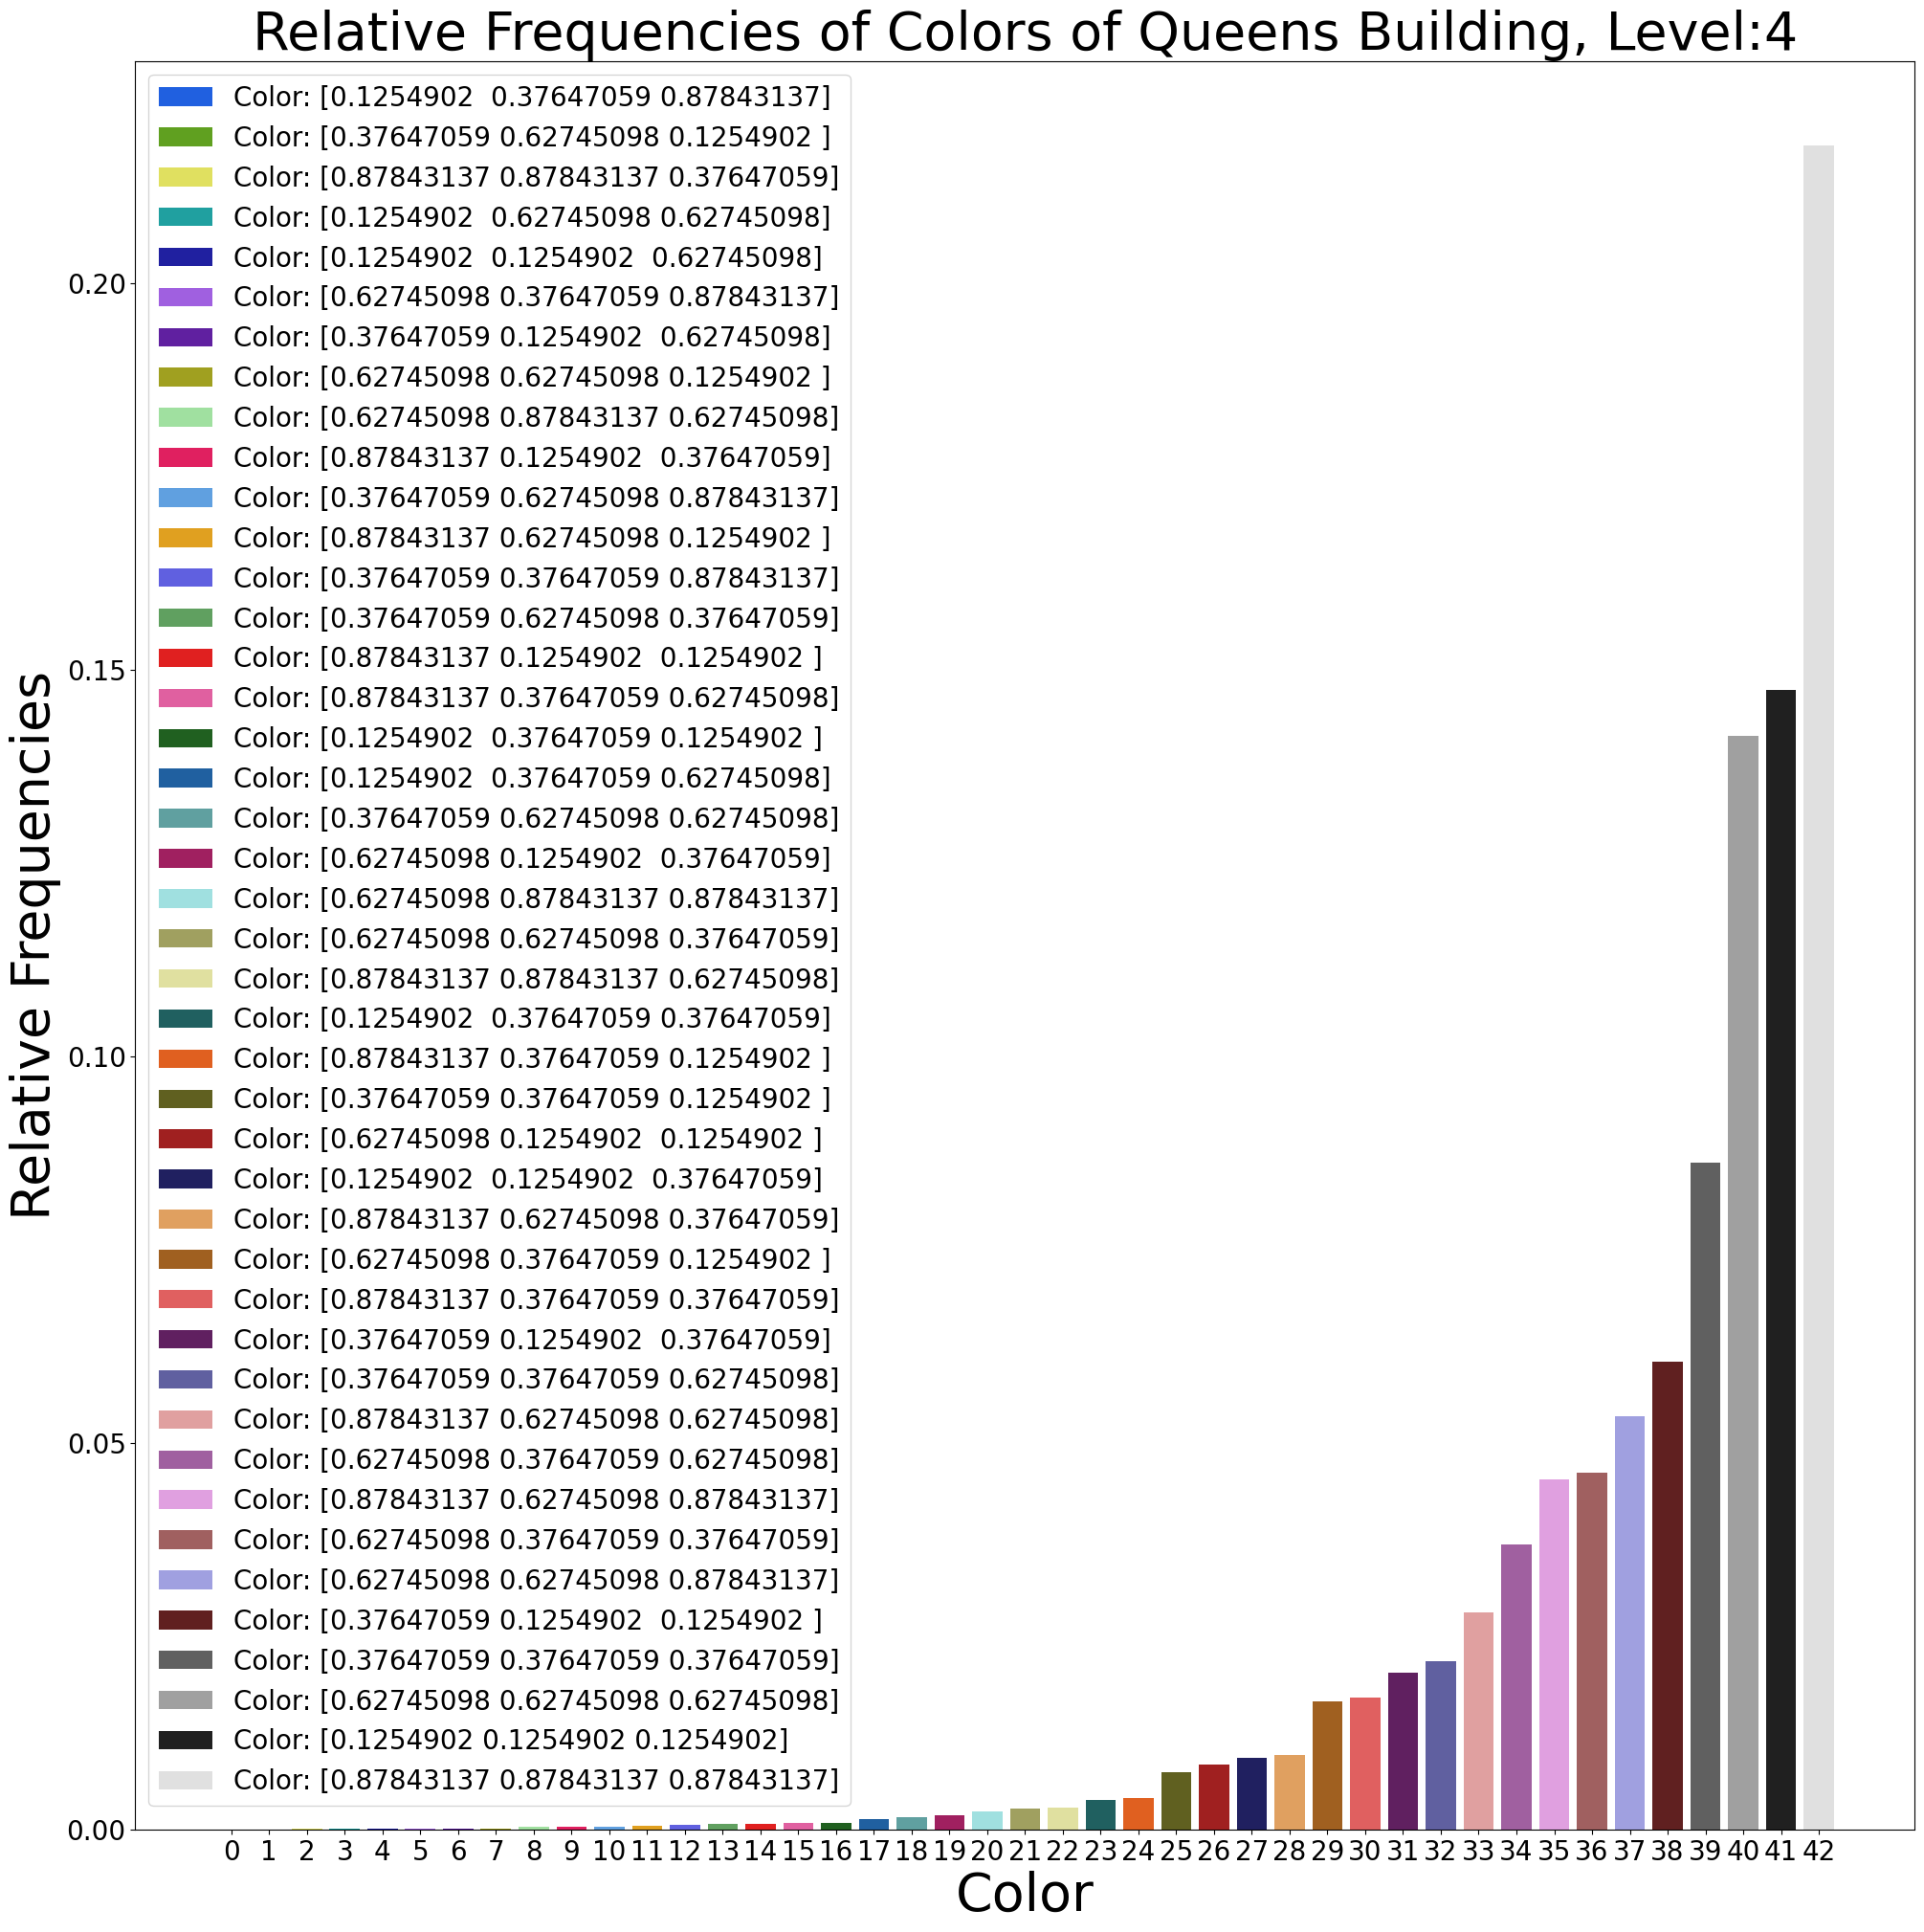

In [14]:
# use our function to obtain data first.
mean_colors_list, relative_frequencies = color_frequencies(image, 4)

# we can use bar plot to present the relationship between mean color and it's relative frequencies
# but first, use np.argsort to get index and sort two lists
index = np.argsort(relative_frequencies)
sorted_mean_colors_list = np.array(mean_colors_list)[index]
sorted_relative_frequencies = np.array(relative_frequencies)[index]

# create bar plot
plt.figure(figsize=(24, 24))
plt.xticks(range(len(sorted_relative_frequencies)), size=20)
plt.yticks(size=20)
# loop through all the data in my sorted list.
for _ in range(len(sorted_relative_frequencies)):
    plt.bar(
        _,
        sorted_relative_frequencies[_],
        color=sorted_mean_colors_list[_],
        label=f"Color: {sorted_mean_colors_list[_]}",
    )
plt.title(f"Relative Frequencies of Colors of Queens Building, Level:4", size=40)
plt.xlabel("Color", size=40)
plt.ylabel("Relative Frequencies", size=40)
plt.legend(fontsize=20)
plt.show()